In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# Read the csv file into a pandas DataFrame

beer = pd.read_csv('combined_data.csv')
beer.head()

,Unnamed: 0,state,income,abbr,brewery_count,population,wineries,pct_brewery,per_capita_beer,per_capita_wine,total_breweries,pct_winery,total_wineries,avg_temp,total_happiness_score,well_being_score,work_environment_score,community_environment_score,polictical_party
0,0,ALABAMA,49936,AL,53,4887871,9,0.584537,92224,543097,9067,0.191002,4712,62.68,40.11,46,36,36,republican
1,1,ALASKA,68734,AK,49,737438,8,0.540421,15050,92180,9067,0.169779,4712,32.03,36.48,34,49,50,republican
2,2,ARIZONA,62283,AZ,129,7171646,26,1.422742,55594,275833,9067,0.551783,4712,65.97,53.95,24,7,31,republican
3,3,ARKANSAS,49781,AR,45,3013825,10,0.496305,66974,301382,9067,0.212224,4712,60.09,34.07,49,44,25,republican
4,4,CALIFORNIA,70489,CA,1019,39557045,2025,11.238557,38819,19534,9067,42.975382,4712,61.17,64.11,4,12,16,democrat


In [50]:
beer2 = beer.drop(["abbr","pct_brewery","total_breweries","pct_winery","total_wineries", "polictical_party", "per_capita_beer", "per_capita_wine", "work_environment_score", "community_environment_score", "well_being_score"] , axis=1)
beer2.head()
beer2.reset_index(drop=True, inplace=True)

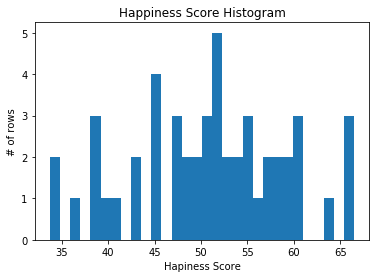

In [43]:
X = beer["total_happiness_score"]
plt.hist(X, bins=30)
plt.title("Happiness Score Histogram")
plt.xlabel("Hapiness Score")
plt.ylabel("# of rows")
plt.show()

Populating the interactive namespace from numpy and matplotlib


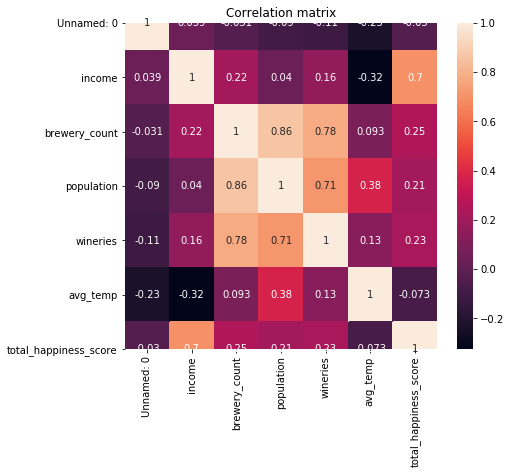

In [52]:
import seaborn as sn

%pylab inline
# pylab.rcParams['figure.figsize'] = (11, 10)
pylab.rcParams['figure.figsize'] = (7, 6)
sn.heatmap(beer2.corr(), annot=True)
plt.title("Correlation matrix")
plt.show()

In [44]:
# Assign the data to X and y

X = beer[["brewery_count", "income", "avg_temp", "population"]]
y = beer["total_happiness_score"].values.reshape(-1, 1)
print(X.shape, y.shape)

(50, 4) (50, 1)


In [45]:
# Use train_test_split to create training and testing data

# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [46]:
# Create the model using LinearRegression

# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [47]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
# YOUR CODE HERE

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5525719503267827
Testing Score: 0.2511162861681989


Text(0.5, 1.0, 'Residual Plot')

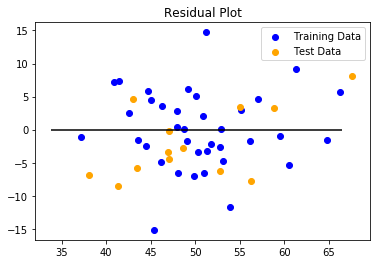

In [48]:
# Plot the Residuals for the Training and Testing data
predictions = model.predict(X)
# Plot Residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c='blue', label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c='orange', label="Test Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
# YOUR CODE HERE

In [49]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()

X_columns = ["population", "income", "total_breweries", "avg_temp"]

train = beer.sample(random_state=42)
test = beer.drop(train.index)

X_train = train[X_columns]
y_train = train["total_happiness_score"]
X_test = test[X_columns]
y_test = test["total_happiness_score"]

reg.fit(X_train, y_train)
print("R^2 score:", reg.score(X_test, y_test))

R^2 score: -0.1938481755898167


In [21]:
# Predicting happiness using linear model, adding polynomial features
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
reg = linear_model.LinearRegression()
poly = PolynomialFeatures(2)

X_columns = [ "population", "total_breweries"]

train = beer.sample(frac=0.8,random_state=42)
test = beer.drop(train.index)

X_train = train[X_columns]
y_train = train["total_happiness_score"]
X_test = test[X_columns]
y_test = test["total_happiness_score"]

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

reg.fit(X_train, y_train)
print("R^2 poly score:", reg.score(X_test, y_test))

R^2 poly score: -0.8328709093439459
